# TSA Final Project

Group 15<br>
Ahmed Raza Sharif - 23PGAI0120<br>
Akash Deshwani – 23PGAI0035<br>
Harshada Jadhav - 23PGAI0101<br>
Rohan Mehta – 23PGAI0001<br>


# Install Libraries

In [212]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import pmdarima as pm
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Reading Dataset

In [2]:
df = pd.read_csv('AirPassengers - Original.csv')

# Explatory Data Analysis

The data comprises of the number of passengers flown with an aircraft carrier month-wise. The data is store in 2 columns:
1. Date (Monthwise data from January-1949 to December-1960)
2. Passenger (Number of passengers flying with the company in that month)

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


There are no null values

In [4]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
new_columns = ['Date', 'Passengers']
df.columns = new_columns
df.set_index("Date",inplace=True)
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Measuring statistics of passengers column. There are a total of 144 data points, Mean passengers count is 288 with a standard deviation of 119.96. Minimum passengers are 104 and Maximum passengers are 622

In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


The histogram shows the distribution of the passengers data

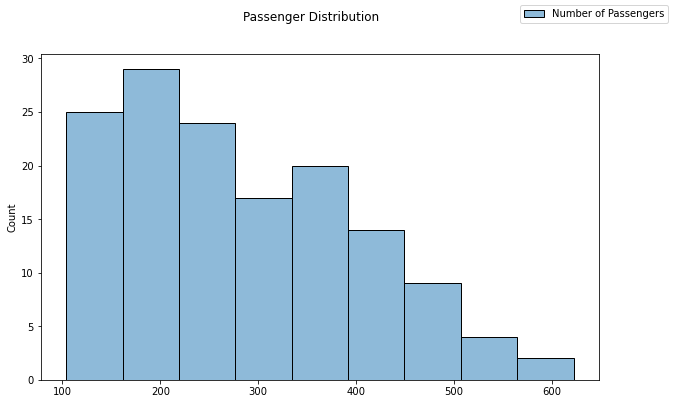

In [7]:
fig, ax1 = plt.subplots(1, figsize=(10, 6))
sns.histplot(data=df, ax=ax1, legend='')
plt.suptitle('Passenger Distribution')
fig.legend(['Number of Passengers'])
plt.show()

The box and whisker plot shows that there are no outliers in passengers data

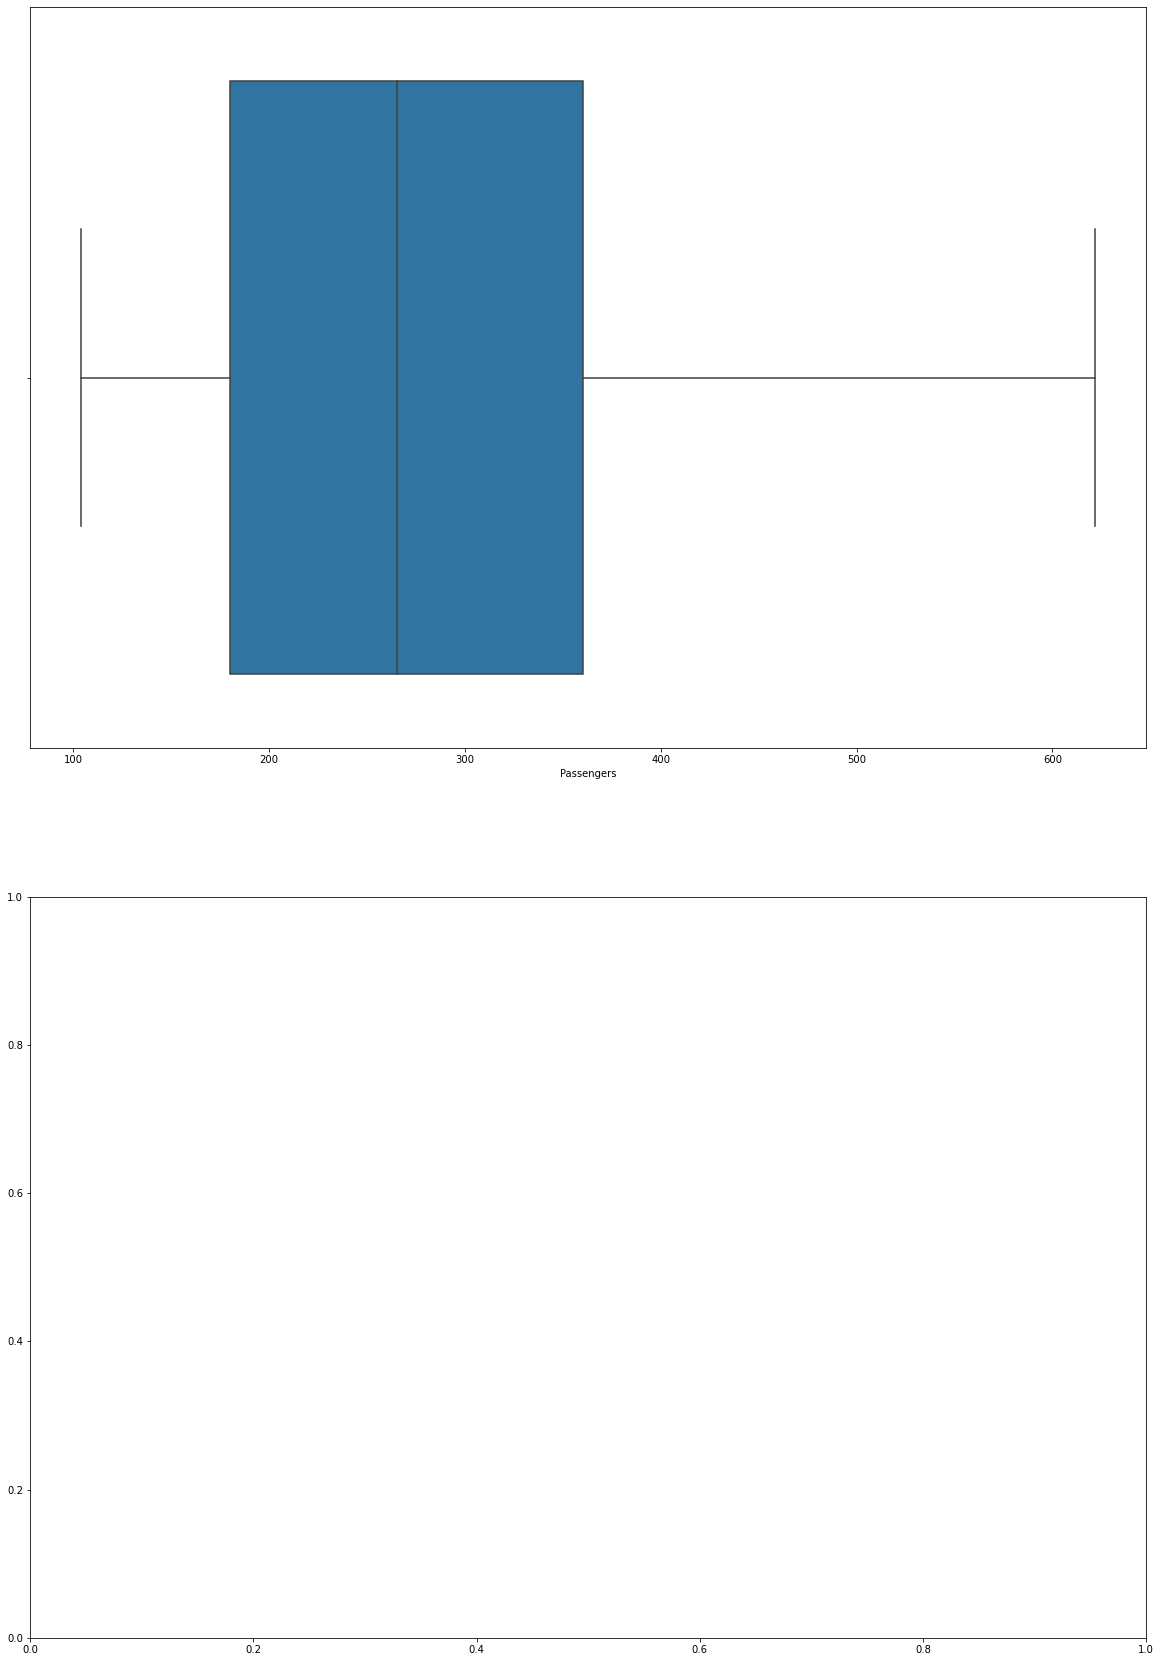

In [8]:
f, axes = plt.subplots(2, 1, figsize=(20,30), sharex=False)
axes = axes.flatten()
for idx, column in enumerate(df.columns[0:1]):
    sns.boxplot(x = df[column].astype('int64'), ax = axes[idx])

Time series line plot. We can see a clear trend and seasonality in the plot.

<AxesSubplot:title={'center':'Passengers Data'}, xlabel='Date'>

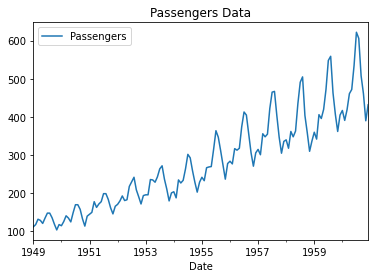

In [9]:
df[['Passengers']].plot(title='Passengers Data')

# 1. Moving Average (Also done in excel)

Here, we can see that as we move from 3 months moving average to 12 months moving average, the seasonality is being eaten up.

In [10]:
df_1 = df[['Passengers']]

df_1['3MA'] = df_1.Passengers.rolling(3).mean().shift(1)
df_1['4MA'] = df_1.Passengers.rolling(4).mean().shift(1)
df_1['6MA'] = df_1.Passengers.rolling(6).mean().shift(1)
df_1['9MA'] = df_1.Passengers.rolling(9).mean().shift(1)
df_1['12MA'] = df_1.Passengers.rolling(12).mean().shift(1)

df_1.head(20)


,Passengers,3MA,4MA,6MA,9MA,12MA
Date,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN,NaN,NaN
1949-04-01,129,120.666667,NaN,NaN,NaN,NaN
1949-05-01,121,126.333333,122.75,NaN,NaN,NaN
1949-06-01,135,127.333333,125.00,NaN,NaN,NaN
1949-07-01,148,128.333333,129.25,124.500000,NaN,NaN
1949-08-01,148,134.666667,133.25,130.500000,NaN,NaN
1949-09-01,136,143.666667,138.00,135.500000,NaN,NaN


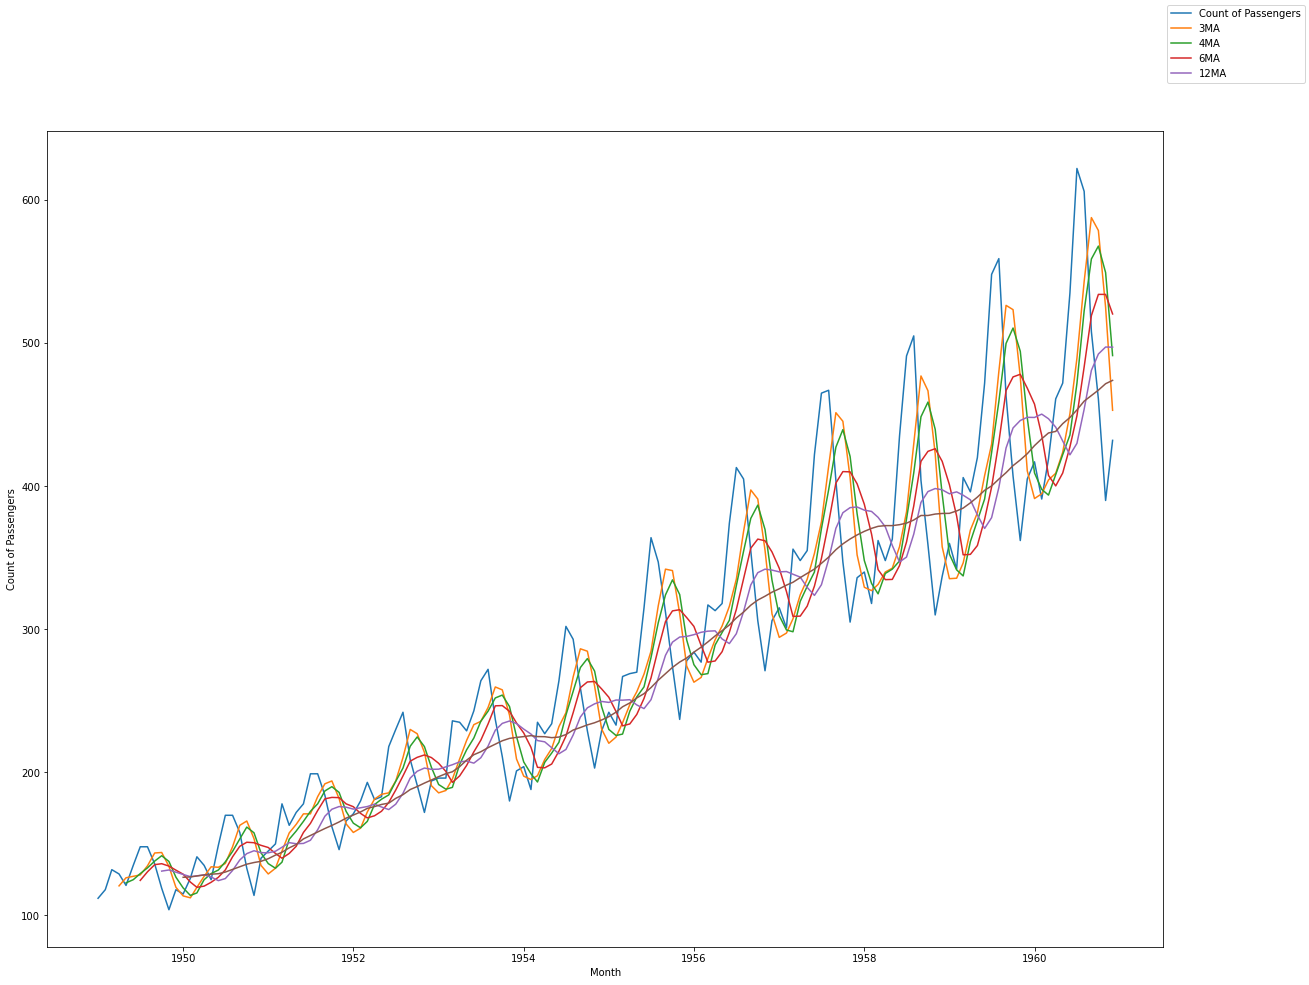

In [11]:
figure, ax1 = plt.subplots(1, figsize=(20, 15))
ax1.plot(df_1['Passengers'])
ax1.plot(df_1['3MA'])
ax1.plot(df_1['4MA'])
ax1.plot(df_1['6MA'])
ax1.plot(df_1['9MA'])
ax1.plot(df_1['12MA'])
ax1.set_xlabel('Month')
ax1.set_ylabel('Count of Passengers')
figure.legend(['Count of Passengers','3MA', '4MA', '6MA', '12MA'])
plt.show()

# 2. Seasonal Index Format (Done in excel)

# 3. Naive Forecast

In [12]:
df_2 = df[['Passengers']]

df_2['Naive'] = df_2['Passengers'].shift(1)
df_2 = df_2[12:]
df_2 = df_2.reset_index()
df_2

,Date,Passengers,Naive
0,1950-01-01,115,118.0
1,1950-02-01,126,115.0
2,1950-03-01,141,126.0
3,1950-04-01,135,141.0
4,1950-05-01,125,135.0
...,...,...,...
127,1960-08-01,606,622.0
128,1960-09-01,508,606.0
129,1960-10-01,461,508.0
130,1960-11-01,390,461.0


In [13]:
rmse = np.sqrt(mean_squared_error(df_2['Passengers'], df_2['Naive'])).round(2)
mape = np.round(np.mean(np.abs(df_2['Passengers']-df_2['Naive'])/df_2['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,34.92,9.07


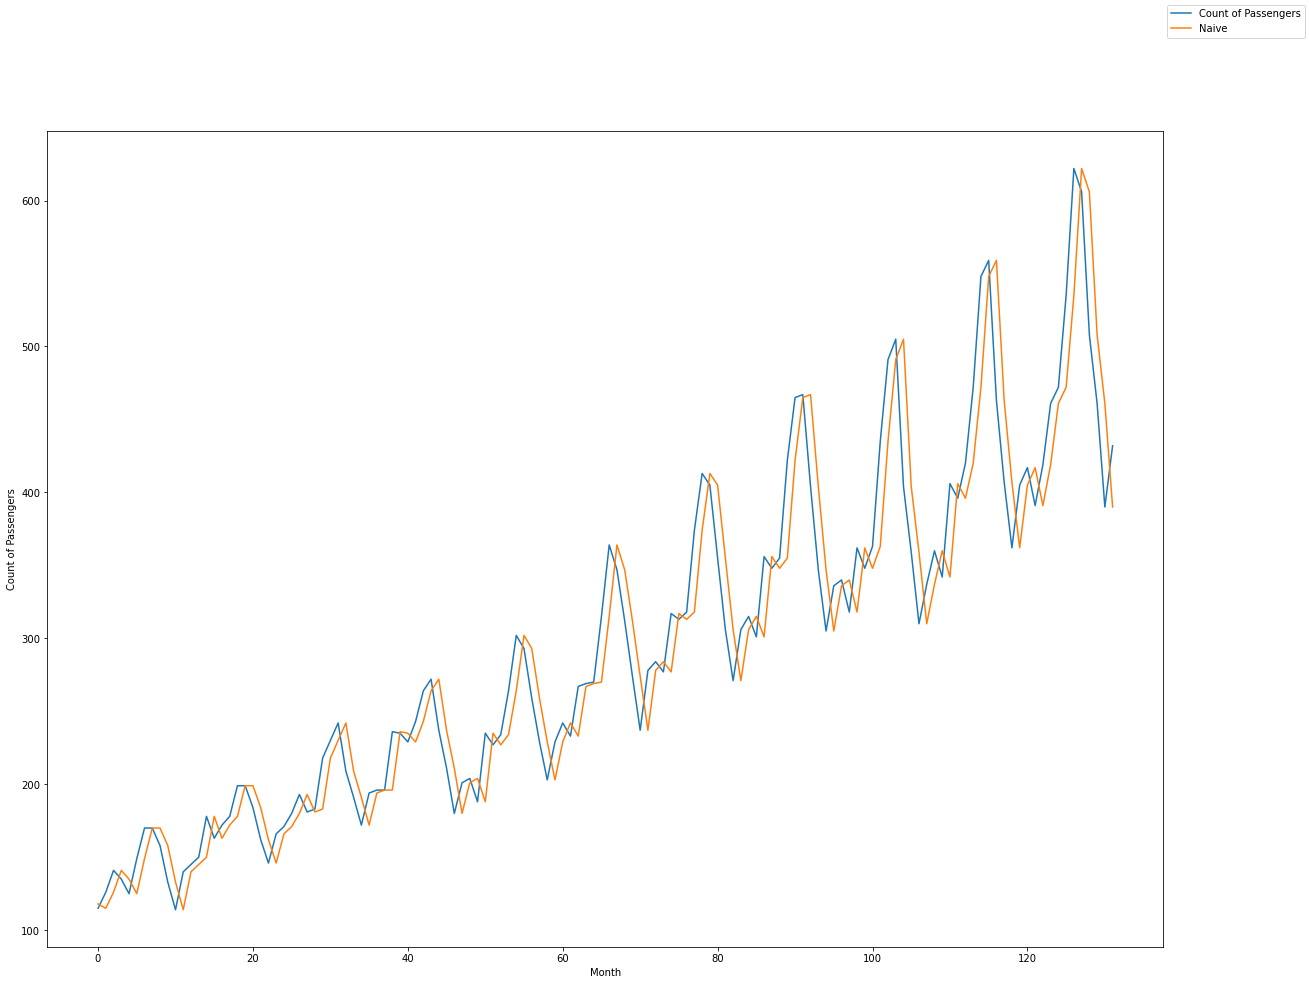

In [14]:
figure, ax1 = plt.subplots(1, figsize=(20, 15))
ax1.plot(df_2['Passengers'])
ax1.plot(df_2['Naive'])
ax1.set_xlabel('Month')
ax1.set_ylabel('Count of Passengers')
figure.legend(['Count of Passengers','Naive', 'Naive_seasonal'])
plt.show()

# 4. Single Exponential Smoothening

Splitting the data into train and test data. 83% train - 17% test split for round numbers

In [15]:
df.index.freq = "MS"
df_train = df[:120]
df_test = df[120:]

In [16]:
def ses_optimizer(df_train, alphas, step=48):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(df_train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(df_test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha, 2), ", mae:", round(mae, 2))
    print("best_alpha:", round(best_alpha, 2), ", best_mae:", round(best_mae, 2))
    return best_alpha,best_mae

In [17]:
alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(df_train, alphas, step=24)

alpha: 0.01 , mae: 190.12
alpha: 0.11 , mae: 82.53
alpha: 0.21 , mae: 82.9
alpha: 0.31 , mae: 89.84
alpha: 0.41 , mae: 99.06
alpha: 0.51 , mae: 107.56
alpha: 0.61 , mae: 113.75
alpha: 0.71 , mae: 117.22
alpha: 0.81 , mae: 118.18
alpha: 0.91 , mae: 117.24
best_alpha: 0.11 , best_mae: 82.53


# Plotting predicted forecast with Single Exponential Smoothing.

It does not give a good forecast.

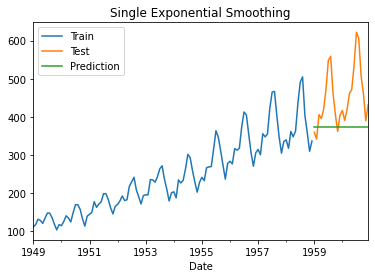

In [18]:
ses_model = SimpleExpSmoothing(df_train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(24)

def plot_prediction(y_pred, label):
    df_train["Passengers"].plot(legend=True, label="Train")
    df_test["Passengers"].plot(legend=True, label="Test")
    y_pred.plot(legend=True, label="Prediction")
    plt.title(label)
    plt.show()
plot_prediction(y_pred, "Single Exponential Smoothing")

# 5. Double Exponential Smoothening

In [19]:
def des_optimizer(df_train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(df_train, trend="add").fit(smoothing_level=alpha, smoothing_trend=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(df_test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 2))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 2))
    return best_alpha, best_beta, best_mae

In [20]:
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)
best_alpha, best_beta, best_mae = des_optimizer(df_train, alphas, betas, step=24)

alpha: 0.01 beta: 0.01 mae: 54.95
alpha: 0.01 beta: 0.11 mae: 54.1
alpha: 0.01 beta: 0.21 mae: 55.56
alpha: 0.01 beta: 0.31 mae: 57.32
alpha: 0.01 beta: 0.41 mae: 57.79
alpha: 0.01 beta: 0.51 mae: 58.0
alpha: 0.01 beta: 0.61 mae: 57.96
alpha: 0.01 beta: 0.71 mae: 57.56
alpha: 0.01 beta: 0.81 mae: 57.33
alpha: 0.01 beta: 0.91 mae: 57.9
alpha: 0.11 beta: 0.01 mae: 55.03
alpha: 0.11 beta: 0.11 mae: 58.47
alpha: 0.11 beta: 0.21 mae: 69.63
alpha: 0.11 beta: 0.31 mae: 72.55
alpha: 0.11 beta: 0.41 mae: 78.82
alpha: 0.11 beta: 0.51 mae: 82.0
alpha: 0.11 beta: 0.61 mae: 77.23
alpha: 0.11 beta: 0.71 mae: 71.5
alpha: 0.11 beta: 0.81 mae: 69.03
alpha: 0.11 beta: 0.91 mae: 67.84
alpha: 0.21 beta: 0.01 mae: 57.18
alpha: 0.21 beta: 0.11 mae: 74.99
alpha: 0.21 beta: 0.21 mae: 95.95
alpha: 0.21 beta: 0.31 mae: 115.32
alpha: 0.21 beta: 0.41 mae: 139.43
alpha: 0.21 beta: 0.51 mae: 178.38
alpha: 0.21 beta: 0.61 mae: 243.45
alpha: 0.21 beta: 0.71 mae: 345.3
alpha: 0.21 beta: 0.81 mae: 489.85
alpha: 0.21 be

# Plotting predicted forecast with Double Exponential Smoothing.

It also does not give a good forecast.

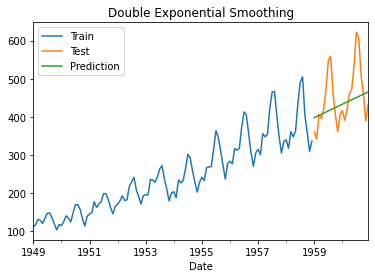

In [21]:
des_model = ExponentialSmoothing(df_train, trend="add").fit(smoothing_level=best_alpha, smoothing_trend=best_beta)
y_pred = des_model.forecast(24)
plot_prediction(y_pred, "Double Exponential Smoothing")

# 6. Triple Exponential Smoothening

In [22]:
def tes_optimizer(df_train, lst, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for i in lst:
        tes_model = ExponentialSmoothing(df_train, trend="add", seasonal="add", seasonal_periods=12).fit(smoothing_level=i[0], smoothing_trend=i[1], smoothing_seasonal=i[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(df_test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = i[0], i[1], i[2], mae
        print([round(i[0], 2), round(i[1], 2), round(i[2], 2), round(mae, 2)])
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_gamma, best_mae

In [23]:
alphas = np.arange(0.10, 1, 0.20)
betas = np.arange(0.10, 1, 0.20)
gammas = np.arange(0.10, 1, 0.20)
lst = list(itertools.product(alphas, betas, gammas))
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(df_train, lst, step=24)

[0.1, 0.1, 0.1, 36.83]
[0.1, 0.1, 0.3, 34.88]
[0.1, 0.1, 0.5, 35.91]
[0.1, 0.1, 0.7, 38.72]
[0.1, 0.1, 0.9, 42.55]
[0.1, 0.3, 0.1, 53.96]
[0.1, 0.3, 0.3, 53.0]
[0.1, 0.3, 0.5, 56.98]
[0.1, 0.3, 0.7, 61.38]
[0.1, 0.3, 0.9, 67.17]
[0.1, 0.5, 0.1, 56.76]
[0.1, 0.5, 0.3, 51.72]
[0.1, 0.5, 0.5, 53.39]
[0.1, 0.5, 0.7, 60.08]
[0.1, 0.5, 0.9, 79.29]
[0.1, 0.7, 0.1, 34.04]
[0.1, 0.7, 0.3, 25.93]
[0.1, 0.7, 0.5, 27.81]
[0.1, 0.7, 0.7, 27.91]
[0.1, 0.7, 0.9, 38.32]
[0.1, 0.9, 0.1, 26.87]
[0.1, 0.9, 0.3, 25.32]
[0.1, 0.9, 0.5, 53.88]
[0.1, 0.9, 0.7, 38.38]
[0.1, 0.9, 0.9, 17.78]
[0.3, 0.1, 0.1, 54.54]
[0.3, 0.1, 0.3, 38.34]
[0.3, 0.1, 0.5, 31.57]
[0.3, 0.1, 0.7, 30.99]
[0.3, 0.1, 0.9, 29.23]
[0.3, 0.3, 0.1, 72.71]
[0.3, 0.3, 0.3, 22.6]
[0.3, 0.3, 0.5, 11.99]
[0.3, 0.3, 0.7, 17.11]
[0.3, 0.3, 0.9, 22.32]
[0.3, 0.5, 0.1, 132.33]
[0.3, 0.5, 0.3, 25.74]
[0.3, 0.5, 0.5, 17.3]
[0.3, 0.5, 0.7, 38.38]
[0.3, 0.5, 0.9, 56.82]
[0.3, 0.7, 0.1, 288.32]
[0.3, 0.7, 0.3, 134.86]
[0.3, 0.7, 0.5, 96.77]
[0.3, 0.7, 

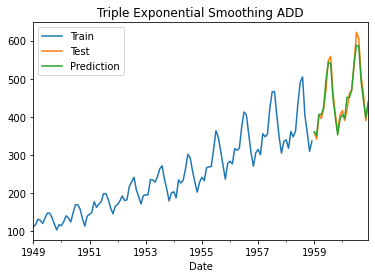

In [24]:
tes_model = ExponentialSmoothing(df_train, trend="add", seasonal="add", seasonal_periods=12).fit(smoothing_level=best_alpha, smoothing_trend=best_beta, smoothing_seasonal=best_gamma)
y_pred = tes_model.forecast(24)
plot_prediction(y_pred, "Triple Exponential Smoothing ADD")

Dickey-Fuller Test to check if the data is stationary.

In [25]:
def dickey_fuller(df_temp):
    p_value = sm.tsa.stattools.adfuller(df_temp)[1]
    if p_value < 0.05:
        print(F"The time series is stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
    else:
        print(F"The time series is non-stationary (H0: non-stationary, p-value: {round(p_value, 3)})")

In [26]:
def ts_decompose(df_temp, model="additive", stationary=False):
    result = seasonal_decompose(df_temp["Passengers"], model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axes[0].set_title("Time series decomposition of " + model + " model")
    axes[0].plot(df_temp["Passengers"], 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')
    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(result.seasonal, 'g', label='Seasonality / Mean: ' + str(round(result.seasonal.mean(), 2)))
    axes[2].legend(loc='upper left')
    axes[3].plot(result.resid, 'r', label='Residuals / Mean: ' + str(round(result.resid.mean(), 2)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)
    plt.figure(figsize=(12,8))
    dickey_fuller(df_temp)

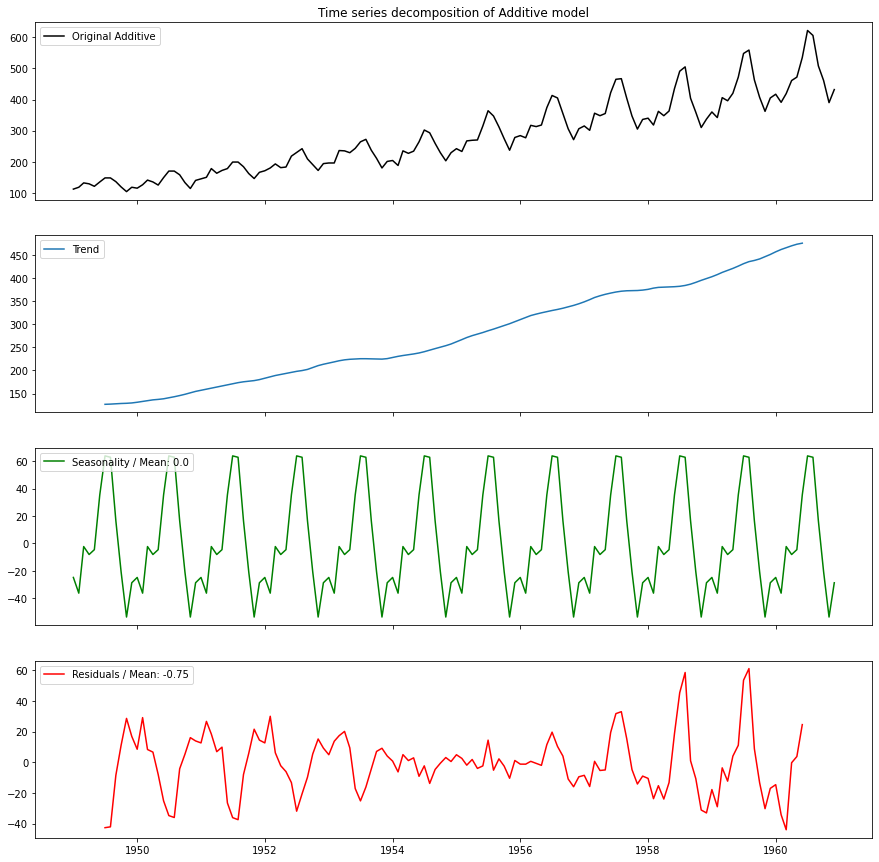

The time series is non-stationary (H0: non-stationary, p-value: 0.992)


<Figure size 864x576 with 0 Axes>

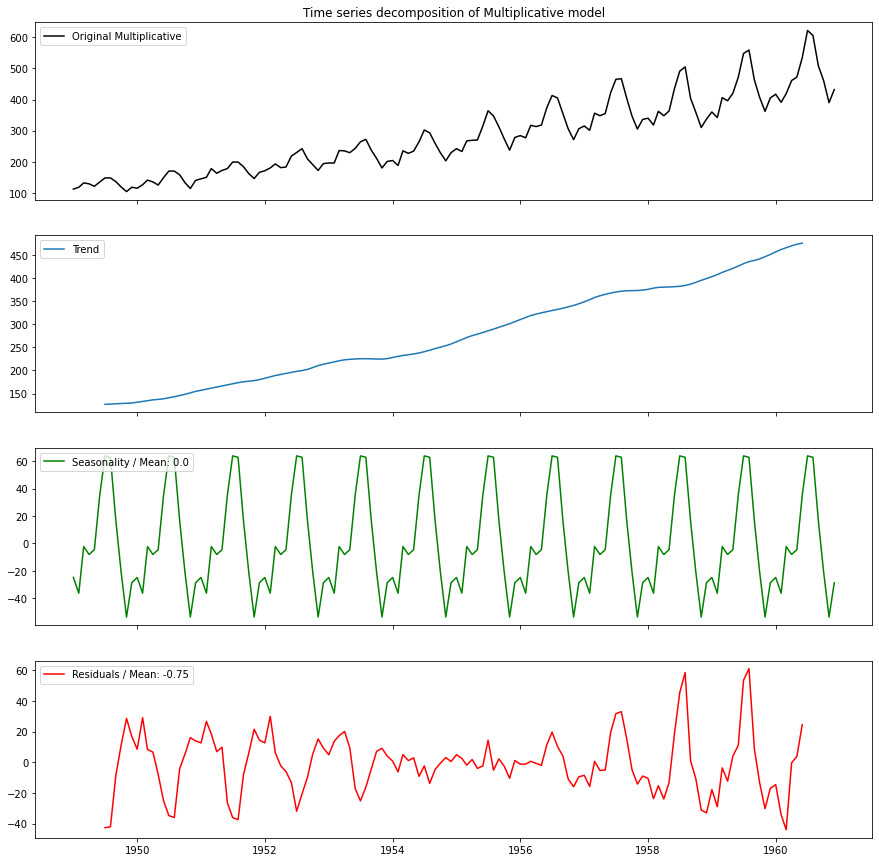

The time series is non-stationary (H0: non-stationary, p-value: 0.992)


<Figure size 864x576 with 0 Axes>

In [27]:
for model in ["Additive", "Multiplicative"]:
  ts_decompose(df, model)

# ARIMA (AutoRegressive Integrated Moving Average)

In [28]:
y = df['Passengers']

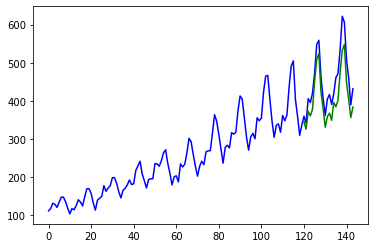

In [29]:
model = pm.auto_arima(df_train, seasonal=True, m=12)
forecasts = model.predict(df_test.shape[0])
x = np.arange(y.shape[0])
plt.plot(x, y, c='blue')
plt.plot(x[df_train.shape[0]:], forecasts, c='green')
plt.show()

In [30]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

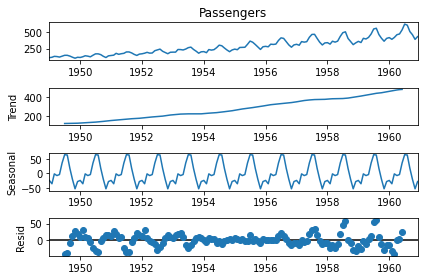

In [31]:
seasonal_decompose(x=df["Passengers"], period=12).plot()
plt.show()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\coola\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


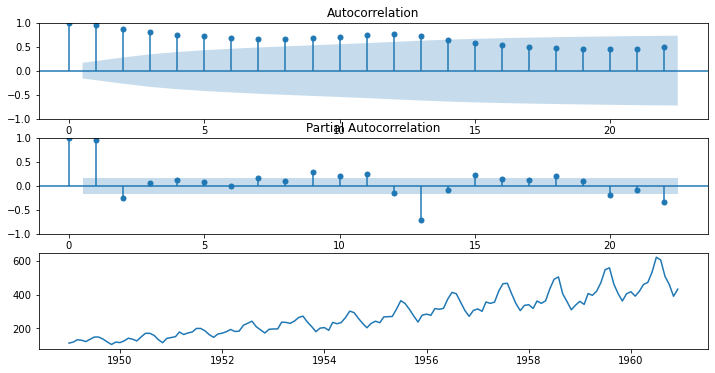

In [33]:
acf_col_df = df["Passengers"]

fig, ax = plt.subplots(3, figsize=(12,6))
ax[0] = plot_acf(acf_col_df, ax=ax[0])
ax[1] = plot_pacf(acf_col_df, ax=ax[1])
ax[2].plot(acf_col_df)

# SARIMA (Seasonal AutoRegressive Integrated Moving Average)

In [35]:
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)
i = list(itertools.product(p, d, q))
seasonal_i = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
for j in i:
    for k in seasonal_i:
        print('SARIMAX: {} x {}'.format(j, k))
temp = []
for j in i:
    for k in seasonal_i:
        try:
            mod = SARIMAX(df_train, order=j, seasonal_order=k, enforce_stationarity=False, enforce_invertibility=False, freq="MS")
            results = mod.fit()
            temp.append([j, k, results.aic, results.bic])
            print('SARIMA{}x{}12 - AIC:{} BIC:{}'.format(j, k, results.aic, results.bic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 0) x (0, 0, 1, 12)
SARIMAX: (0, 0, 0) x (0, 0, 2, 12)
SARIMAX: (0, 0, 0) x (0, 1, 0, 12)
SARIMAX: (0, 0, 0) x (0, 1, 1, 12)
SARIMAX: (0, 0, 0) x (0, 1, 2, 12)
SARIMAX: (0, 0, 0) x (0, 2, 0, 12)
SARIMAX: (0, 0, 0) x (0, 2, 1, 12)
SARIMAX: (0, 0, 0) x (0, 2, 2, 12)
SARIMAX: (0, 0, 0) x (1, 0, 0, 12)
SARIMAX: (0, 0, 0) x (1, 0, 1, 12)
SARIMAX: (0, 0, 0) x (1, 0, 2, 12)
SARIMAX: (0, 0, 0) x (1, 1, 0, 12)
SARIMAX: (0, 0, 0) x (1, 1, 1, 12)
SARIMAX: (0, 0, 0) x (1, 1, 2, 12)
SARIMAX: (0, 0, 0) x (1, 2, 0, 12)
SARIMAX: (0, 0, 0) x (1, 2, 1, 12)
SARIMAX: (0, 0, 0) x (1, 2, 2, 12)
SARIMAX: (0, 0, 0) x (2, 0, 0, 12)
SARIMAX: (0, 0, 0) x (2, 0, 1, 12)
SARIMAX: (0, 0, 0) x (2, 0, 2, 12)
SARIMAX: (0, 0, 0) x (2, 1, 0, 12)
SARIMAX: (0, 0, 0) x (2, 1, 1, 12)
SARIMAX: (0, 0, 0) x (2, 1, 2, 12)
SARIMAX: (0, 0, 0) x (2, 2, 0, 12)
SARIMAX: (0, 0, 0) x (2, 2, 1, 12)
SARIMAX: (0, 0, 0) x (2, 2, 2, 12

SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1178.3085578668083 BIC:1185.97018854161
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1051.665467787151 BIC:1054.338296621613
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:898.2434073974712 BIC:903.3511611806723
SARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:758.168372729787 BIC:765.4248945531768
SARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:860.802751956608 BIC:863.3566288482085
SARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:719.8653067788227 BIC:724.7029879944159
SARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:2532.2122629141527 BIC:2539.0003025452766
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:920.0320211136797 BIC:925.3962835679281
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:910.2659042023712 BIC:918.2843907057569
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:814.7956557934206 BIC:825.0111633598227
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:861.7878855815944 BIC:866.9165819645301
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:825.6006595988569 BIC:833.2622902736584
SARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:716.3388905994384 BIC:726.

C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:1929.8360968883183 BIC:1938.8868163964835
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:828.4798254158952 BIC:836.1728699902988
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:827.1383897220105 BIC:837.3957824878819
SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:816.6951609256187 BIC:829.4645453836214
SARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:745.2215688959127 BIC:752.5140192924426


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:730.1576677540388 BIC:739.8809349494121


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:723.3973142340406 BIC:735.4915172730235
SARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:648.465298066004 BIC:655.2952964230522
SARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:632.3655492890522 BIC:641.4722137651164


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:2730.544291437531 BIC:2741.8576908227374
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1500.6481786765362 BIC:1506.1895479254674
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1251.8424862002048 BIC:1259.832803482541
SARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:1048.7517572052116 BIC:1058.9249363342915
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:950.9259634151645 BIC:956.2528416033886
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:827.3655398678158 BIC:834.9954242146258
SARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:710.8237942114386 BIC:720.4506712004955
SARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:814.7102247450366 BIC:819.7968143095766
SARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:673.3146072986347 BIC:680.5347650404274


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:2421.0483842026315 BIC:2430.042365170829
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:866.7700428000492 BIC:874.8164364814219
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:847.4191465856773 BIC:858.0729029621256


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:764.9114778334093 BIC:777.6279517447593
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:819.8427353728669 BIC:827.5357799472704
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:774.5181618587379 BIC:784.691340987818
SARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:673.4242403066659 BIC:685.4578365429871
SARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:710.6002716271331 BIC:717.892722023663
SARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:674.9512588108671 BIC:684.5781357999241


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:2438.6154979532535 BIC:2449.8579741635003
SARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:780.1011654080455 BIC:790.3585581739169


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:781.414629314058 BIC:794.2363702713972


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:775.9313598167423 BIC:791.1911285103623
SARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:707.1908067052093 BIC:716.9140739005826
SARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:710.3293214897858 BIC:722.4834054840023


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:675.4241413114217 BIC:689.8644567950073
SARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:604.2373532126006 BIC:613.3440176886648
SARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:591.7097255781788 BIC:603.093056173259


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:2477.66725807549 BIC:2491.158229527786
SARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:1426.8308311645824 BIC:1435.1173529689756
SARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:1161.2974725311665 BIC:1171.9133139317967


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:979.0924776124008 BIC:991.755475078167
SARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:887.2256425175328 BIC:895.1875235680054
SARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:771.975350733208 BIC:782.105748705821
SARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:667.2721480363614 BIC:679.2443938097235
SARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:774.971718807752 BIC:782.5695172872119
SARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:639.2906032234436 BIC:648.8683998421333


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:2509.7861148390207 BIC:2520.956647362007
SARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:833.7333706771169 BIC:844.4618955856138
SARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:831.8178811785518 BIC:845.0876829293394


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:759.9757886241108 BIC:775.1713855830303
SARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:784.4380710849955 BIC:794.6954638508669
SARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:738.1902780447435 BIC:750.8532755105098


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:643.6240357542036 BIC:657.9907306822383
SARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:683.0051209489807 BIC:692.728388144354
SARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:641.2758802651155 BIC:653.2481260384776


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:2524.87965525502 BIC:2538.2842942826037
SARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:772.1864041026726 BIC:785.0081450600118


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:751.1732220512217 BIC:766.5593112000288


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:726.0055482634867 BIC:743.7337447155595
SARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:678.7269662469447 BIC:690.8810502411612


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:681.1663472414372 BIC:695.751248034497
SARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:641.9867410123136 BIC:658.7478850950207
SARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:589.7238739096 BIC:601.1072045046802
SARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:576.8100075747913 BIC:590.4700042888876


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:2563.3858651677206 BIC:2579.0246106999016
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1130.208381775829 BIC:1132.9790664002946
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:944.7540457071935 BIC:950.0809238954176
SARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:801.7131089352092 BIC:809.3429932820193
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:800.893019666178 BIC:803.5564587602901
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:718.7837282236524 BIC:723.8703177881923


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:633.2837437013751 BIC:640.5039014431678
SARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:783.677636163525 BIC:786.220930945795
SARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:635.6931786056989 BIC:640.5066171002275


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:2410.9964644555243 BIC:2417.7419501816726
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:803.6098875377918 BIC:808.9555452067156
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:787.9387707076205 BIC:795.9290879899567
SARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:709.5579765158502 BIC:719.7311556449303
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:725.5312575371996 BIC:730.6390113204008
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:718.2170831628767 BIC:725.8469675096868
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:634.6731633640958 BIC:644.3000403531528
SARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:663.1981396789203 BIC:668.0358208945134
SARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:636.4395502217445 BIC:643.6597079635372


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:1694.2695425854113 BIC:1703.2635235536088
SARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:716.8579609761877 BIC:724.5195916509892
SARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:717.8414242055741 BIC:728.0569317719762
SARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:706.9995056278941 BIC:719.7159795392441
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:639.6897297574807 BIC:646.9462515808705
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:636.3639021733779 BIC:646.0392646045643
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:632.298570089418 BIC:644.3321663257393
SARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:553.4492125976402 BIC:560.2372522287642
SARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:554.8239800175887 BIC:563.874699525754


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:2362.6532605305424 BIC:2373.8957367407893
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1109.7640573028434 BIC:1115.2884051724388
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:932.9610236621734 BIC:940.922904712646
SARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:794.1051414087635 BIC:804.2355393813766
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:790.3588699230413 BIC:795.6667906233564
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:707.5086518255519 BIC:715.1064503050117


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:623.6836956430302 BIC:633.2614922617199
SARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:767.2629897164207 BIC:772.3281887027273
SARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:617.9085746664551 BIC:625.0919221304724


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:2555.2426105616096 BIC:2564.1790365799984
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:793.1710381603287 BIC:801.1895246637145
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:769.9079305229219 BIC:780.523771923552
SARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:692.6972117583344 BIC:705.3602092241007
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:722.0012446769559 BIC:729.6628753517575
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:709.5082585237052 BIC:719.6386564963182
SARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:617.28937965081 BIC:629.2616254241722
SARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:651.2714708671961 BIC:658.5279926905858
SARIMA(0, 1, 1)x(1, 2, 1, 12)12 - AIC:621.8353678569322 BIC:631.4131644756219
SARIMA(0, 1, 1)x(1, 2, 2, 12)12 - AIC:2577.6650796135746 BIC:2588.835612136561
SARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:704.4294022148914 BIC:714.6449097812936
SARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:706.2616621849136 BIC:719.0310466429163
SARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:688.529268386993 BIC:703.7

C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:2519.2705615981326 BIC:2532.675200625716
SARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:1101.35127861354 BIC:1109.6120491868592
SARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:927.2145922287025 BIC:937.792155825268
SARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:784.5472274435359 BIC:797.1561703287812
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:785.7838669437037 BIC:793.7170396411278
SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:702.5202495671527 BIC:712.607403875349


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:619.0506047150386 BIC:630.9607378884081
SARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:762.0047965575619 BIC:769.5701622887091
SARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:612.9809732486088 BIC:622.5090797873044


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:2925.2268356856025 BIC:2936.3243742114832
SARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:794.9850467446109 BIC:805.6763620824586
SARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:765.0479600943311 BIC:778.269914590038
SARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:687.7501458517014 BIC:702.8808773139956
SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:723.855548631017 BIC:734.0710561974191
SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:700.9241999261525 BIC:713.5331428113977
SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:612.538172831535 BIC:626.8303326395783
SARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:653.0781938134114 BIC:662.7535562445978
SARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:616.6589934349547 BIC:628.5691266083242


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:2946.2368978849945 BIC:2959.5539441160513
SARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:705.6955783127129 BIC:718.4649627707156


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:708.1817402216661 BIC:723.5050015712694
SARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:681.1946231059993 BIC:698.8471431453426
SARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:638.7568587661618 BIC:650.8510618051448
SARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:636.5298954311746 BIC:651.0429390779542
SARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:615.5766732737769 BIC:632.2508597164941
SARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:551.2080258780375 BIC:562.521425263244
SARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:545.897254077471 BIC:559.4733333397188


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:2895.1317130941115 BIC:2910.6682670303444
SARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:1162.676364525045 BIC:1165.438538459843
SARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:984.19718334193 BIC:989.5051040422451
SARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:846.34674703412 BIC:853.9445455135798
SARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:889.8325601540992 BIC:892.4865205042566
SARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:794.4798233587849 BIC:799.5450223450914


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:696.0094353154374 BIC:703.1927827794547
SARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:866.9983461720669 BIC:869.5309456652202
SARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:707.3771479666801 BIC:712.166046276025


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:3026.809145744597 BIC:3033.511465258389
SARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:899.0245707322695 BIC:904.3514489204936
SARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:883.6862277204685 BIC:891.6481087709411
SARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:790.4501526559167 BIC:800.5805506285296
SARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:803.8389747407552 BIC:808.9255643052952
SARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:796.4790260860328 BIC:804.0768245654926


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:698.3689293368222 BIC:707.946725955512
SARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:740.4934128875966 BIC:745.3068513821252
SARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:708.1006310736685 BIC:715.2839785376858


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:2593.9698854188 BIC:2602.906311437189
SARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:803.8555248048326 BIC:811.4854091516427
SARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:801.4762125482865 BIC:811.6493916773666
SARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:792.1686059168168 BIC:804.831603382583
SARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:703.143108415857 BIC:710.3632661576497
SARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:698.4604912404642 BIC:708.0873682295212
SARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:687.6115776574507 BIC:699.5838234308128
SARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:610.7941623712271 BIC:617.5396480973752
SARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:611.0616341294611 BIC:620.0556150976586


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:2733.9223406312885 BIC:2745.092873154275
SARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:1118.1166606778431 BIC:1123.6238410600558
SARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:932.5565412929323 BIC:940.4897139903563
SARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:788.168665207761 BIC:798.2558195159572
SARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:793.3115971359836 BIC:798.6003789342664
SARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:707.8297220327116 BIC:715.3950877638588
SARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:621.8358987805223 BIC:631.3640053192178


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:773.6383171405561 BIC:778.6818942946542
SARIMA(0, 2, 1)x(0, 2, 1, 12)12 - AIC:624.4408932734495 BIC:631.5869731774712


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(0, 2, 2, 12)12 - AIC:2573.5367991536814 BIC:2582.4148299743856
SARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:803.7550305694067 BIC:811.7453478517428
SARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:781.2729128099159 BIC:791.8504764064813
SARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:700.8800228234968 BIC:713.4889657087421
SARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:723.9941978736454 BIC:731.6240822204554
SARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:709.8293952398211 BIC:719.9165495480173
SARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:620.9579002055825 BIC:632.868033378952
SARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:662.544591558298 BIC:669.7647493000907
SARIMA(0, 2, 1)x(1, 2, 1, 12)12 - AIC:625.796707073049 BIC:635.3248136117445


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(1, 2, 2, 12)12 - AIC:2575.8473571603336 BIC:2586.9448956862143
SARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:716.6261045109194 BIC:726.7992836399994
SARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:719.1492877520246 BIC:731.8657616633747
SARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:697.484513042957 BIC:712.6152445052512
SARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:637.0995345551428 BIC:646.7264115441998
SARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:634.5002992351577 BIC:646.533895471479
SARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:618.7469241422489 BIC:633.0390839502921
SARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:552.7948650698066 BIC:561.7888460380041
SARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:553.7979004192201 BIC:565.0403766294669


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:2573.2435512541088 BIC:2586.5605974851655
SARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:1097.882502238711 BIC:1106.1172986238007
SARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:920.8324146281522 BIC:931.3713305810707
SARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:781.3602593169945 BIC:793.9145568495787
SARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:782.6887352903406 BIC:790.5929222550295
SARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:696.6370428990397 BIC:706.6804809251071
SARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:612.7191689508785 BIC:624.5664082132137
SARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:756.5472727209508 BIC:764.0798512405013
SARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:610.118916811848 BIC:619.5967082217161


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:2747.4627759199043 BIC:2758.486239016859
SARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:794.1058119958736 BIC:804.759568372322
SARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:763.2655239427853 BIC:776.4391688839335
SARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:683.6367932000104 BIC:698.7019502391115
SARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:720.295015698805 BIC:730.468194827885
SARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:698.6363281480259 BIC:711.1906256806101
SARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:610.1201778170484 BIC:624.3368649318505
SARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:651.5358205830508 BIC:661.1626975721078
SARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:611.5518069422664 BIC:623.3990462046015


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:2749.807575773681 BIC:2763.035731490027
SARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:704.6301010829181 BIC:717.3465749942682
SARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:707.30911727848 BIC:722.5688859721
SARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:678.2369763941975 BIC:695.8129929398154
SARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:635.7815748641236 BIC:647.8151711004449
SARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:633.3962238745027 BIC:647.8365393580882
SARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:611.0043990802493 BIC:627.5905340475184
SARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:549.2021779765901 BIC:560.4446541868368
SARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:550.7122396626927 BIC:564.2032111149889


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:2747.1092787161365 BIC:2762.542127051873
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1140.8085946729896 BIC:1146.3668416592127
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:955.2122981592145 BIC:963.2307846626002
SARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:811.9239845280051 BIC:822.1394920944073
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:806.8805771233783 BIC:812.2262347923021
SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:725.2204063988829 BIC:732.8820370736845
SARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:639.3245258191802 BIC:648.9998882503666
SARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:781.393511865703 BIC:786.5012656489041
SARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:636.5996617607426 BIC:643.8561835841324


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:2750.1176705150006 BIC:2759.168390023166
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:797.3116519018221 BIC:805.3301384052078
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:790.4909643360847 BIC:801.1822796739324
SARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:712.414915913147 BIC:725.1843003711497
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:725.1348656500362 BIC:732.7964963248378
SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:724.7675311122384 BIC:734.9830386786406
SARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:637.0963442885246 BIC:649.1905473275076
SARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:657.2624928357981 BIC:664.5190146591879
SARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:637.4871079678612 BIC:647.1624703990476


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:2058.238572289735 BIC:2069.551971674942
SARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:712.4278259275999 BIC:722.643333494002
SARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:713.6640988448013 BIC:726.433483302804
SARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:710.8699325428221 BIC:726.1931938924254
SARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:639.2043422105318 BIC:648.8797046417181
SARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:636.0018276597102 BIC:648.0960306986932


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:636.0003521083125 BIC:650.5133957550921
SARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:551.326063636252 BIC:560.3767831444172
SARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:552.9357503532347 BIC:564.2491497384412


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:2365.5651870140778 BIC:2379.1412662763255
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1120.5245246890306 BIC:1128.8365785624276
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:943.4610054356582 BIC:954.1147618121065
SARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:805.3379662202361 BIC:818.0544401315861
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:797.3029477922801 BIC:805.2932650746162
SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:715.8741637945743 BIC:726.0473429236544
SARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:630.9522372056903 BIC:642.9858334420115
SARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:771.5582637118913 BIC:779.1881480587014
SARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:626.55494735151 BIC:636.181824340567


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:2398.5814961890555 BIC:2409.8239723993024
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:792.3688024933425 BIC:803.0601178311902
SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:778.2718061180568 BIC:791.5890015886172
SARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:701.8561915331387 BIC:717.1159602267587
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:722.4649324824503 BIC:732.6804400488525
SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:714.8406499585964 BIC:727.5571238699464
SARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:626.4687339477769 BIC:640.9090494313624
SARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:650.9840869915075 BIC:660.6594494226939
SARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:627.1694870175463 BIC:639.2030832538676


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:2412.856962287159 BIC:2426.347933739455
SARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:705.6757677491696 BIC:718.4451522071723


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:708.2802586958506 BIC:723.6035200454539
SARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:697.952274712488 BIC:715.755338188378
SARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:636.8937925362402 BIC:648.9879955752232
SARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:634.6984026672155 BIC:649.2114463139951
SARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:629.6634199417729 BIC:646.5104546726227
SARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:549.6956326144127 BIC:561.0090319996193
SARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:551.6434878694159 BIC:565.2195671316638


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:2456.320219832194 BIC:2472.0596865265397
SARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:1111.9642572118455 BIC:1123.0129529510366
SARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:937.4919102951969 BIC:950.7617120459845


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:796.1904863093865 BIC:811.386083268306
SARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:792.6160410931974 BIC:803.2318824938275
SARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:709.464175708009 BIC:722.1271731737752
SARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:625.5549108159306 BIC:639.9216057439653
SARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:764.8888587399173 BIC:775.0192567125303
SARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:618.1268245564304 BIC:630.0990703297925


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:2441.309159064293 BIC:2454.7137980918765


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:794.8667037341634 BIC:808.230847906473
SARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:772.8885027787999 BIC:788.812264879745


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:695.4895943249942 BIC:713.217790777067
SARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:724.1594507741343 BIC:736.928835232137
SARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:708.5880812315702 BIC:723.7836781904897
SARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:618.5488627647702 BIC:635.3100068474773
SARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:652.3404318400645 BIC:664.4346348790475
SARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:622.5906502170282 BIC:636.9573451450628


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:2386.602173824288 BIC:2402.240919356469
SARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:706.3642487962964 BIC:721.6875101458996
SARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:708.3024512711405 BIC:726.1795895123443
SARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:690.2844055886775 BIC:710.5452015339035
SARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:638.709427998554 BIC:653.2224716453336
SARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:636.6357692428627 BIC:653.5676534974389
SARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:621.536620420038 BIC:640.6922136574176
SARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:551.4306068612444 BIC:565.0066861234923
SARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:553.3757699078848 BIC:569.214529047174


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:2430.934201641888 BIC:2448.8070536786663
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1122.0563376078728 BIC:1127.597706856804
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:941.9589533599207 BIC:949.9492706422568
SARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:802.5740985013683 BIC:812.7472776304484
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:796.5203939251495 BIC:801.8472721133736
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:714.7773954480865 BIC:722.4072797948966


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:631.7367975232794 BIC:641.3636745123364
SARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:774.6095918698109 BIC:779.6961814343508
SARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:627.1660279966007 BIC:634.3861857383935


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:2447.543400592146 BIC:2456.5373815603434
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:785.9720073865739 BIC:793.96232466891
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:775.6501058633346 BIC:786.3038622397829
SARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:699.3609912672254 BIC:712.0774651785754
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:714.7181062500989 BIC:722.347990596909
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:713.876020727478 BIC:724.0491998565581
SARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:626.0666224716581 BIC:638.1002187079794
SARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:643.7663815340161 BIC:650.9865392758088
SARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:631.1655637732377 BIC:640.7924407622947


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:2437.1128269210903 BIC:2448.355303131337
SARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:696.5949198178745 BIC:706.7680989469545


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:698.9048688322247 BIC:711.6213427435747
SARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:695.3943660426958 BIC:710.6541347363158
SARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:629.6775617214213 BIC:639.3044387104783
SARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:627.9085287107362 BIC:639.9421249470574
SARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:629.7826949580179 BIC:644.2230104416035
SARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:542.24436584175 BIC:551.2383468099474
SARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:537.3597455234358 BIC:548.6022217336825


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:2358.810676819091 BIC:2372.301648271387
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1108.6307352194513 BIC:1116.9172570238445
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:932.8027998369756 BIC:943.4186412376057
SARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:791.8876499746018 BIC:804.550647440368
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:791.524114188244 BIC:799.4859952387166
SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:708.4380786890382 BIC:718.5684766616512


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:625.0476296036472 BIC:637.0198753770094
SARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:768.590502139687 BIC:776.1883006191468
SARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:619.3254530289935 BIC:628.9032496476832
SARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:2442.6928109025343 BIC:2453.8633434255207
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:787.9676881333096 BIC:798.6214445097579
SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:771.090954841492 BIC:784.3607565922796


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:695.277848566491 BIC:710.4734455254105
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:716.0357007974737 BIC:726.2088799265538
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:707.7201353790042 BIC:720.3831328447704
SARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:618.3928236731012 BIC:632.7595186011358
SARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:645.7582995717297 BIC:655.3851765607867
SARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:623.3213863285038 BIC:635.2936321018659
SARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:2593.0053744030292 BIC:2606.4100134306127
SARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:698.539074179818 BIC:711.2555480911681
SARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:700.3961628814201 BIC:715.6559315750401
SARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:689.9265632616623 BIC:707.6547597137351
SARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:631.3577717421613 BIC:643.3913679784825
SARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:629.884189703959 BIC:644.3245051875446
SARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:622.235608156553 BIC:638.99

C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:2190.0170810311492 BIC:2205.6558265633303
SARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:1092.8501003538472 BIC:1103.8644611182726
SARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:919.5140287806697 BIC:932.7359832763766
SARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:782.8543527873686 BIC:797.9850842496628
SARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:786.897753916574 BIC:797.4753175131394
SARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:703.5893753747494 BIC:716.1983182599946


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:617.7091788766502 BIC:632.0013386846935
SARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:762.6621580702707 BIC:772.7493123784669
SARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:614.2158886988516 BIC:626.126021872221


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:1981.554617664226 BIC:1994.8716638952826
SARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:789.7429728246348 BIC:803.0601682951951
SARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:766.7487434280042 BIC:782.6150888228525
SARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:689.7937807341104 BIC:707.4463007734537
SARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:718.0318558091391 BIC:730.7483297204891
SARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:702.4821118372075 BIC:717.6128432995017
SARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:614.2226337224312 BIC:630.8968201651484
SARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:645.8755552786329 BIC:657.9091515149541
SARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:618.2367293748737 BIC:632.5288891829169


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:2035.2406821564443 BIC:2050.777236092677
SARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:699.7792069468015 BIC:715.0389756404215
SARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:701.6300793752911 BIC:719.4331428511811
SARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:683.6404119603131 BIC:703.8147205767054
SARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:633.20441982812 BIC:647.6447353117055
SARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:631.7788401253191 BIC:648.6258748561689
SARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:617.2903287927495 BIC:636.3465418701405
SARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:545.8223649261657 BIC:559.3133363784619
SARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:540.6523693057896 BIC:556.3918360001352


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:1875.0656541177152 BIC:1892.8217157591241
SARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:1159.2393417282317 BIC:1164.7636895978271
SARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:975.7603762930912 BIC:983.7222573435638
SARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:831.181369610754 BIC:841.3117675833671
SARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:837.0033152858622 BIC:842.3112359861773
SARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:747.6790192344356 BIC:755.2768177138954


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:658.6149077002214 BIC:668.1927043189111
SARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:812.4703974991429 BIC:817.5355964854494
SARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:659.1633214070446 BIC:666.3466688710619


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:3143.704899550165 BIC:3152.641325568554
SARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:833.0017968159256 BIC:840.9636778663981
SARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:825.2970249488425 BIC:835.9128663494726
SARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:740.3504989259038 BIC:753.0134963916701
SARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:747.5349024880962 BIC:755.132700967556
SARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:749.6784365381429 BIC:759.808834510756


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:659.3916383174205 BIC:671.3638840907827
SARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:678.2766680167208 BIC:685.4600154807381
SARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:659.9048594337162 BIC:669.4826560524059


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:3146.1124463166507 BIC:3157.282978839637
SARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:739.543733284642 BIC:749.6741312572551
SARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:741.1314900995642 BIC:753.7944875653304
SARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:738.1236144332196 BIC:753.3192113921391
SARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:658.4135396453032 BIC:667.9913362639929
SARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:658.71224309706 BIC:670.6844888704221
SARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:658.7474791080745 BIC:673.114174036109
SARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:570.1948079857178 BIC:579.1312340041069
SARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:562.2689166306275 BIC:573.4394491536137


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:3143.3618610734084 BIC:3156.766500100992
SARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:1110.6254056100113 BIC:1118.8861761833305
SARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:929.8892977085524 BIC:940.4668613051178
SARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:788.8787933741539 BIC:801.4877362593992
SARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:789.176033570332 BIC:797.1092062677561
SARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:704.7487331599334 BIC:714.8358874681296
SARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:619.2982675071012 BIC:631.2084006804706
SARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:765.2365000088115 BIC:772.8018657399587
SARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:617.0508793903607 BIC:626.5789859290562


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:2802.064325430748 BIC:2813.1618639566286
SARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:786.0908231205229 BIC:796.706664521153
SARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:769.2837175770582 BIC:782.505672072765
SARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:690.9904500835916 BIC:706.1211815458857
SARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:712.1434900404131 BIC:722.2738880130262
SARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:706.7486870318988 BIC:719.3576299171441
SARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:616.704503771926 BIC:630.9966635799693
SARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:641.5577947232762 BIC:651.1355913419659
SARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:622.2022271455185 BIC:634.1123603188879


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:2804.5192133707205 BIC:2817.8362596017773
SARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:695.9847783451576 BIC:708.6477758109238


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:745.3201390172678 BIC:760.5157359761873
SARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:686.6971330269968 BIC:704.34965306634
SARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:627.8761082183322 BIC:639.8483539916944
SARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:624.972767746288 BIC:639.3394626743227
SARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:619.3920480524923 BIC:636.0662344952095
SARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:538.2850718703328 BIC:549.455604393319


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:529.4645649761553 BIC:542.8692040037389


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:2800.4987913425393 BIC:2816.035345278772
SARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:1096.2275345299367 BIC:1107.2072630433897
SARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:919.9075261701139 BIC:933.081171111262
SARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:779.1641115153836 BIC:794.2292685544847
SARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:783.7248264593458 BIC:794.2637424122643
SARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:697.9016586151018 BIC:710.455956147686
SARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:614.3618658055558 BIC:628.5785529203579
SARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:758.0848217714514 BIC:768.1282597975188
SARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:611.7890360907347 BIC:623.6362753530698


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:2886.062412711428 BIC:2899.290568427774
SARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:788.0394999145893 BIC:801.3093016653769


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:764.421656611055 BIC:780.2300305404328


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:685.3349888611747 BIC:702.9110054067926
SARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:715.0229495157811 BIC:727.6859469815473
SARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:699.9005432042777 BIC:714.9657002433788


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:614.1434134808314 BIC:630.7295484481006
SARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:643.5454408509535 BIC:655.5176866243156
SARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:612.9791111173698 BIC:627.1957982321719


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:2888.6038421822072 BIC:2904.036690517944
SARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:697.5621307565308 BIC:712.7577277154503
SARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:699.3447527420299 BIC:717.0729491941026


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:679.9532146541136 BIC:700.0400907062484
SARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:628.7550835261444 BIC:643.1217784541791
SARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:626.9727336960889 BIC:643.733877778796
SARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:612.8475244328033 BIC:631.8031072525395
SARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:539.9988574223223 BIC:553.4034964499059


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:531.2102135154994 BIC:546.8489590476802


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:2886.058311070905 BIC:2903.6958520260328
SARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:1123.9528888704053 BIC:1132.2649427438023
SARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:952.2630225399894 BIC:962.954337877837
SARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:812.6686936252422 BIC:825.4380780832449
SARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:796.7890848070194 BIC:804.7794020893556
SARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:721.738181532593 BIC:731.9536890989951
SARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:637.3362287226743 BIC:649.4304317616572
SARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:770.4082640070948 BIC:778.0381483539048
SARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:632.072808343695 BIC:641.7481707748814


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:2870.9893469207145 BIC:2882.302746305921
SARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:784.5411686704796 BIC:795.1949250469279
SARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:776.878301456749 BIC:790.1954969273094
SARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:706.778523272789 BIC:722.1017846223923
SARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:715.1088666500028 BIC:725.2820457790829
SARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:717.1418768041741 BIC:729.8583507155241
SARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:632.4866842940819 BIC:646.9997279408615
SARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:642.5154092420468 BIC:652.1422862311038
SARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:625.8393622742901 BIC:637.8729585106114


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:2886.4095864908413 BIC:2899.985665753089
SARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:697.3517547993883 BIC:710.0682287107384


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:699.590802633732 BIC:714.850571327352
SARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:697.1086827998612 BIC:714.9117462757512
SARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:629.4962130556662 BIC:641.5298092919875
SARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:627.6621322791891 BIC:642.1024477627747
SARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:627.7903019227423 BIC:644.6373366535921
SARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:542.3353888602642 BIC:553.5778650705109
SARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:536.7681118271526 BIC:550.2590832794488


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:3113.9861707325763 BIC:3129.725637426922
SARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:1119.8215766713906 BIC:1130.9043151692533
SARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:945.4500801487629 BIC:958.7672756193233
SARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:803.5053612935097 BIC:818.7651299871297
SARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:798.1138320637541 BIC:808.7675884402024
SARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:716.3716303250229 BIC:729.0881042363729
SARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:632.3208320661116 BIC:646.7611475496972
SARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:770.7225840625504 BIC:780.8957631916304
SARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:626.7776834760012 BIC:638.8112797123225


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:2548.4287160167323 BIC:2561.9196874690283
SARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:786.2960768958801 BIC:799.6132723664405
SARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:778.8720145714783 BIC:794.8526491361507
SARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:702.0372926618741 BIC:719.840356137764
SARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:716.3263549744759 BIC:729.0428288858259
SARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:715.594717362014 BIC:730.854486055634
SARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:626.9664132070742 BIC:643.813447937924
SARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:644.1777564630708 BIC:656.211352699392
SARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:631.6304422976112 BIC:646.0707577811968


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:2170.1173990050147 BIC:2185.8568656993602
SARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:699.2906328398531 BIC:714.5504015334731
SARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:701.2816599342275 BIC:719.0847234101175
SARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:699.0580459608996 BIC:719.4044042190596
SARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:630.9505691597446 BIC:645.3908846433302
SARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:629.6253839133228 BIC:646.4724186441726
SARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:631.4442344523616 BIC:650.6979884304756
SARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:544.2627584033596 BIC:557.7537298556558
SARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:538.6780192778865 BIC:554.417485972232


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:2245.353712336337 BIC:2263.3416742727322
SARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:1093.6371154839114 BIC:1107.4479851579001


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:937.4941492756391 BIC:953.4179113765842


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:794.9709248948683 BIC:812.6991213469411
SARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:793.5894555651433 BIC:806.8592573159309
SARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:710.347584399602 BIC:725.5431813585216
SARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:626.7315749647207 BIC:643.4927190474278
SARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:764.7680764300244 BIC:777.4310738957906
SARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:619.374330524805 BIC:633.7410254528397


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:2989.158873114097 BIC:3004.797618646278
SARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:790.4145942861226 BIC:806.395228850795


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:774.4985283292535 BIC:793.0762507803562


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:697.3680575309552 BIC:717.6288534761812
SARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:718.3086282541336 BIC:733.5683969477536
SARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:708.4462810425458 BIC:726.1744774946186
SARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:620.3213950994875 BIC:639.4769883368671
SARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:644.7746337806363 BIC:659.2149492642219
SARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:620.3837906943462 BIC:637.1449347770533


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:3003.736146451969 BIC:3021.608998488747


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:700.9758558222246 BIC:718.7789192981146
SARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:702.530405552733 BIC:722.8767638108931


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:692.2167972998334 BIC:715.0101927382127
SARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:631.4233819770174 BIC:648.2704167078672
SARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:631.6250387642118 BIC:650.8787927423258


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:623.1705388913207 BIC:644.7205812833727
SARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:544.6012189665377 BIC:560.3406856608832
SARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:540.6494173419569 BIC:558.6373792783518


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:3042.454683670758 BIC:3062.5616422121334
SARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:1109.565047500567 BIC:1117.8515693049603
SARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:941.7959595176802 BIC:952.4497158941285
SARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:804.1649951075888 BIC:816.8814690189388
SARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:791.8043094807108 BIC:799.7661905311834
SARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:716.395251900896 BIC:726.5684310299761


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:633.6042738872204 BIC:645.6378701235417
SARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:769.0107992750922 BIC:776.608597754552
SARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:629.1422166723293 BIC:638.7690936613863
SARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:2608.8385047812417 BIC:2620.0809809914886
SARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:781.6004513490293 BIC:792.2162927496594
SARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:771.1983145478783 BIC:784.4681162986659
SARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:701.2801854741805 BIC:716.5399541678005
SARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:708.6443111512264 BIC:718.7747091238393
SARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:707.8302178907002 BIC:720.4932153564664
SARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:627.9623319544174 BIC:642.402647438003
SARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:636.270037801997 BIC:645.8478344206867
SARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:623.364914163718 BIC:635.3371599370802
SARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:2630.4112493943776 BIC:2643.

C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:773.0415395980488 BIC:788.9653016989939
SARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:696.0642913939506 BIC:713.7924878460234
SARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:709.4122678706453 BIC:722.0752653364116
SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:708.1142086747826 BIC:723.3098056337021
SARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:624.3341849609917 BIC:641.0953290436988
SARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:636.3230426581501 BIC:648.2952884315123
SARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:621.7253867620165 BIC:636.0920816900511
SARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:14.0 BIC:29.638745532180817
SARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:691.5015723490449 BIC:706.6971693079644


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:694.6321047719573 BIC:712.3603012240301
SARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:690.1347149034575 BIC:710.3955108486836
SARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:623.6965341123982 BIC:638.0632290404328
SARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:623.4328875514992 BIC:640.1940316342063


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:622.6011009461197 BIC:641.7566941834992
SARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:534.5625726372082 BIC:547.9672116647918


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:529.8311526621832 BIC:545.469898194364


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:16.0 BIC:33.87285203677808
SARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:1069.1688743122677 BIC:1082.9368252677996
SARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:906.2438694002242 BIC:922.1102147950725


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:775.3334075783656 BIC:792.9859276177089
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:784.1753151085088 BIC:797.3972696042157
SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:700.9224955031517 BIC:716.0532269654459


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:618.4397822101205 BIC:635.1139686528377
SARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:760.9675653446338 BIC:773.5765082298791
SARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:615.6654011814561 BIC:629.9575609894994


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:2353.8219736610245 BIC:2369.3585275972573
SARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:784.8675404603197 BIC:800.7913025612648
SARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:767.2859229105006 BIC:785.7966592044902


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:691.1100751521019 BIC:711.2843837684942
SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:707.8693770333803 BIC:723.0649739922998
SARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:700.9261916633884 BIC:718.5787117027317
SARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:617.3393296783281 BIC:636.3955427557191
SARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:638.6894409462558 BIC:653.0561358742905
SARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:619.8214085151812 BIC:636.4955949578984
SARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:2559.599499411681 BIC:2577.35556105309
SARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:695.1209097754912 BIC:712.849106227564
SARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:695.4482331450672 BIC:715.7090290902933
SARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:685.1521689230922 BIC:707.8482661165335
SARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:624.818634604441 BIC:641.5797786871481
SARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:623.1562736840477 BIC:642.3118669214273
SARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:618.8262332859152 BIC:640.264

C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:528.5798638838614 BIC:546.4527159206395


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:2018.4195835703451 BIC:2038.39515291693
SARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:1143.8431487805267 BIC:1152.1039193538459
SARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:973.2717326016839 BIC:983.887574002314
SARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:829.1248379512806 BIC:841.7878354170468
SARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:823.7915156955773 BIC:831.7246883930014
SARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:742.7094194599662 BIC:752.8398174325791


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:654.3370662350427 BIC:666.3093120084048
SARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:800.3416779682773 BIC:807.9070436994244
SARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:651.8545398920141 BIC:661.4323365107039


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:2774.5951802234204 BIC:2785.7657127464067
SARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:814.7726499816114 BIC:825.3502135781769
SARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:799.6702519732571 BIC:812.892206468964
SARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:725.9270677806442 BIC:741.1226647395637
SARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:734.9024265851284 BIC:744.9895808933246
SARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:737.1240712536019 BIC:749.7330141388471
SARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:654.4584030228099 BIC:668.8250979508446
SARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:663.7603725320115 BIC:673.288479070707
SARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:644.0225404869336 BIC:655.9326736603031


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(1, 2, 2, 12)12 - AIC:2773.0111971238152 BIC:2786.4158361513987
SARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:716.8193145357133 BIC:729.4282574209585


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:719.4735475174964 BIC:734.6042789797906
SARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:712.8475976637701 BIC:730.5001177031133
SARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:646.926617554127 BIC:658.8367507274965
SARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:644.1199803525989 BIC:658.4121401606421
SARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:642.2085631800645 BIC:658.8827496227817
SARIMA(2, 2, 0)x(2, 2, 0, 12)12 - AIC:547.3792486274638 BIC:558.4767871533443
SARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:549.1927401709282 BIC:562.5097864019849


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:2642.8757296866397 BIC:2658.4122836228726
SARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:1107.2920289256456 BIC:1118.306389690071
SARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:929.7902442307839 BIC:943.0121987264907
SARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:790.4698627619762 BIC:805.6005942242704
SARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:790.9183559366086 BIC:801.4959195331741
SARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:706.427054798872 BIC:719.0359976841172
SARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:621.1757428804103 BIC:635.4679026884536
SARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:767.1506769936542 BIC:777.2378313018504
SARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:619.0365917585082 BIC:630.9467249318776


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:3664.325930466362 BIC:3677.642976697419
SARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:780.9567099091112 BIC:794.178664404818


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:771.178620723938 BIC:787.0449661187863
SARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:733.0560444705548 BIC:750.708564509898
SARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:707.1413169808867 BIC:719.750259866132
SARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:705.6296303699239 BIC:720.7603618322181
SARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:620.2633551541458 BIC:636.937541596863
SARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:635.6030066114823 BIC:647.5131397848518
SARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:624.1369532060083 BIC:638.4291130140516


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:3455.815203995673 BIC:3471.351757931906
SARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:731.6560794888135 BIC:746.7868109511077
SARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:732.8246305997112 BIC:750.4771506390545
SARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:687.6564535422724 BIC:707.8307621586647
SARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:622.3789717047412 BIC:636.6711315127844
SARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:620.330721943773 BIC:637.0049083864902
SARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:622.0022051153879 BIC:641.058418192779
SARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:532.1980589657833 BIC:545.51510519684
SARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:524.5663611102822 BIC:540.1029150465149


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:3384.1311919010795 BIC:3401.8872535424885
SARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:1098.0780046349307 BIC:1111.802665276747
SARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:920.8068907063283 BIC:936.6152646357061
SARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:780.2145334580654 BIC:797.7905500036833
SARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:785.7149052211931 BIC:798.8885501623413
SARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:699.8863724986436 BIC:714.9515295377447
SARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:616.3607084093591 BIC:632.9468433766282
SARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:759.8246252902893 BIC:772.3789228228735
SARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:613.7016382081983 BIC:627.9183253230004


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:3075.457993374734 BIC:3090.890841710471
SARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:782.9218645084443 BIC:798.7882099032926


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:764.7435758870578 BIC:783.1866788046652
SARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:686.2401744316405 BIC:706.3270504837753
SARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:708.8524493329323 BIC:723.9831807952265
SARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:701.8862547314599 BIC:719.4622712770778
SARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:614.6608176179083 BIC:633.6164004376444
SARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:637.3790751758203 BIC:651.6712349838635
SARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:614.9014556533596 BIC:631.4875906206287


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:2385.598778559796 BIC:2403.2363195149237
SARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:689.9135655788816 BIC:707.5660856182249


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:692.49945942904 BIC:712.6737680454323
SARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:679.7652546687515 BIC:702.3629902274031
SARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:624.119097784893 BIC:640.7932842276102


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:620.9174378310843 BIC:639.9736509084753
SARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:614.8450943025557 BIC:636.1701249747589
SARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:533.5202727379693 BIC:549.0568266742021


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:522.6098657180412 BIC:540.3659273594501
SARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:3129.429867260472 BIC:3149.2721008349904


C:\Users\coola\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [98]:
temp_1 = []
for i in temp:
    temp_1.append((i[0], i[1], i[2]+i[3]))
temp_2=[]
for i in temp_1:
    temp_2.append(i[2])
list2 = list(set(temp_2))
list2.sort()
j = 2
print(list2[j])
for i in temp_1:
    if i[2] == list2[j]:
        print(i)

49.87285203677808
((2, 1, 1), (2, 2, 2, 12), 49.87285203677808)


In [90]:
# Best Value, Least AIC BIC at (2,1,1),(0,2,1,12)
sarima_df = df_train
sarimod = SARIMAX(sarima_df, order = (2, 1, 1), seasonal_order=(0, 2, 1, 12),enforce_stationarity=False, enforce_invertibility=False)  
modelfit = sarimod.fit()
print(modelfit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  120
Model:             SARIMAX(2, 1, 1)x(0, 2, 1, 12)   Log Likelihood                -305.621
Date:                            Mon, 09 Jan 2023   AIC                            621.243
Time:                                    01:56:38   BIC                            633.215
Sample:                                01-01-1949   HQIC                           626.046
                                     - 12-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8921      0.836     -1.067      0.286      -2.531       0.747
ar.L2         -0.1616      0.350   

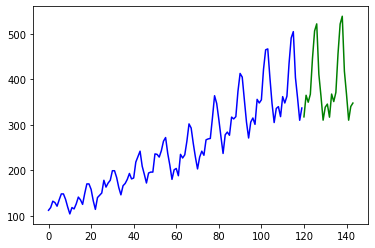

In [91]:
start = df_train.shape[0] + 1
end = df_train.shape[0] + df_test.shape[0]
forecasts = modelfit.predict(start=start, end=end)


x = np.arange(y.shape[0])
plt.plot(x[:df_train.shape[0]], y[:df_train.shape[0]], c='blue')
plt.plot(x[df_train.shape[0]:], forecasts, c='green')
plt.show()

In [92]:
mape = mean_absolute_percentage_error(y[df_train.shape[0]:], forecasts)
mse = mean_squared_error(y[df_train.shape[0]:], forecasts)
mae = mean_absolute_error(y[df_train.shape[0]:], forecasts)
print("MAPE: ", mape)
print("MSE: ", mse)
print("MAE: ", mae)

MAPE:  0.1497064200742201
MSE:  7177.538832808758
MAE:  69.62434007595839


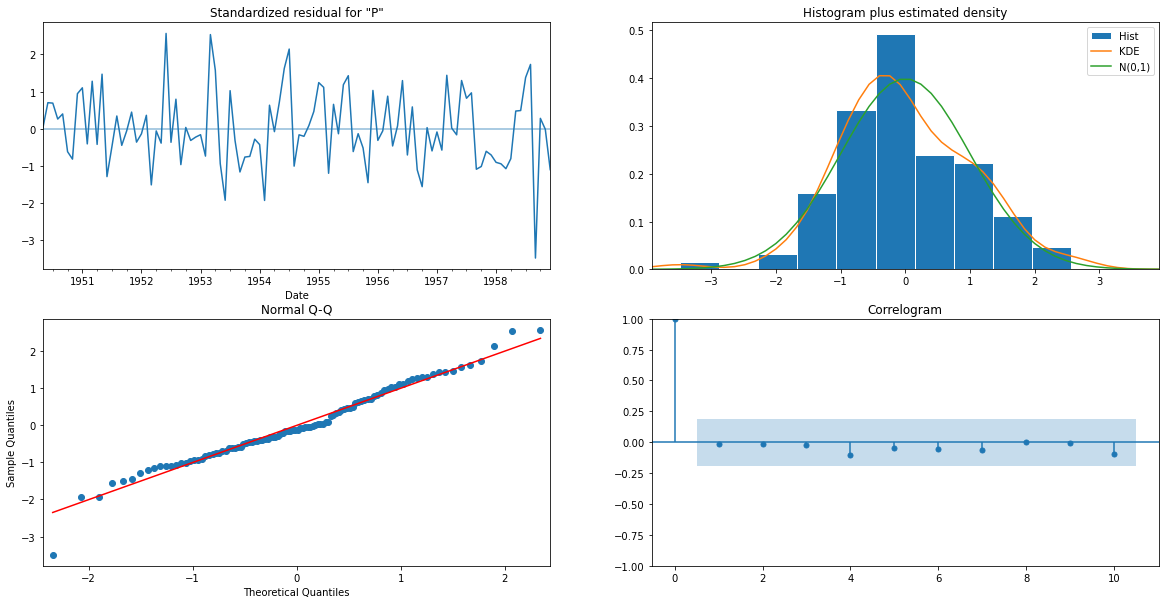

In [127]:
result = modelfit.plot_diagnostics(figsize=(20, 10))